In [59]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# function for cumulative csv file reader
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [3]:
# loading the dataset
df = read_file("/Users/guillermocomesanacimadevila/Desktop/Hypetension/Data/hypertension_dataset.csv")

In [4]:
df

,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174977,India,51,39.4,266,174,82,Never,10.3,Low,Yes,...,9.5,96,172,72,100,95,Female,Tertiary,Employed,Low
174978,Australia,89,39.0,243,104,94,Never,7.2,Moderate,Yes,...,6.2,63,81,66,140,124,Female,Primary,Employed,High
174979,India,43,36.5,266,109,98,Former,22.9,Low,Yes,...,10.0,62,139,39,93,71,Male,Secondary,Employed,High
174980,Germany,48,18.3,294,134,84,Never,15.3,High,No,...,4.7,53,112,37,57,87,Male,Primary,Retired,High


/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/1164045776.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hypertension", data=df, palette="Set2")


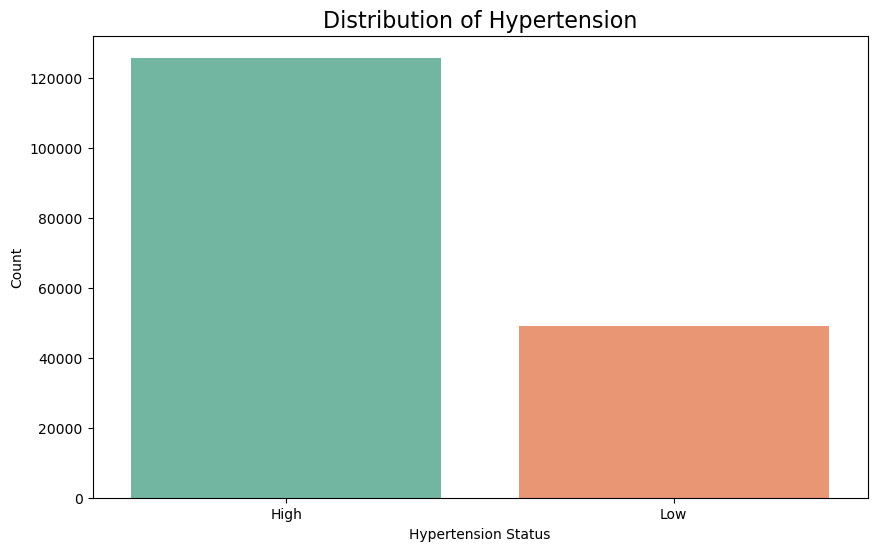

In [58]:
# univariate analysis
# variable distribution

plt.figure(figsize=(10, 6))
sns.countplot(x="Hypertension", data=df, palette="Set2")
plt.title("Distribution of Hypertension", fontsize=16)
plt.xlabel("Hypertension Status")
plt.ylabel("Count")

plt.show()

In [14]:
hypertension_pct = df["Hypertension"].value_counts(normalize=True) * 100
hypertension_pct # normalised value as a %

Hypertension
High    71.882251
Low     28.117749
Name: proportion, dtype: float64

In [17]:
# plot numerical feature distribution
def plot_numerical_distribution(data, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, color="skyblue")
        plt.title(f"Distribution of {col}", fontsize=15)
        plt.xlabel(col)
        plt.show()

In [25]:
for col in df.columns:
    print(col, df[col].dtype)

Country object
Age int64
BMI float64
Cholesterol int64
Systolic_BP int64
Diastolic_BP int64
Smoking_Status object
Alcohol_Intake float64
Physical_Activity_Level object
Family_History object
Diabetes object
Stress_Level int64
Salt_Intake float64
Sleep_Duration float64
Heart_Rate int64
LDL int64
HDL int64
Triglycerides int64
Glucose int64
Gender object
Education_Level object
Employment_Status object
Hypertension object


In [20]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [26]:
numerical_cols

['Age',
 'BMI',
 'Cholesterol',
 'Systolic_BP',
 'Diastolic_BP',
 'Alcohol_Intake',
 'Stress_Level',
 'Salt_Intake',
 'Sleep_Duration',
 'Heart_Rate',
 'LDL',
 'HDL',
 'Triglycerides',
 'Glucose']

In [34]:
# numerical_cols.remove("Stress_Level") # stress_levels = removed

In [32]:
numerical_cols

['Age',
 'BMI',
 'Cholesterol',
 'Systolic_BP',
 'Diastolic_BP',
 'Alcohol_Intake',
 'Salt_Intake',
 'Sleep_Duration',
 'Heart_Rate',
 'LDL',
 'HDL',
 'Triglycerides',
 'Glucose']

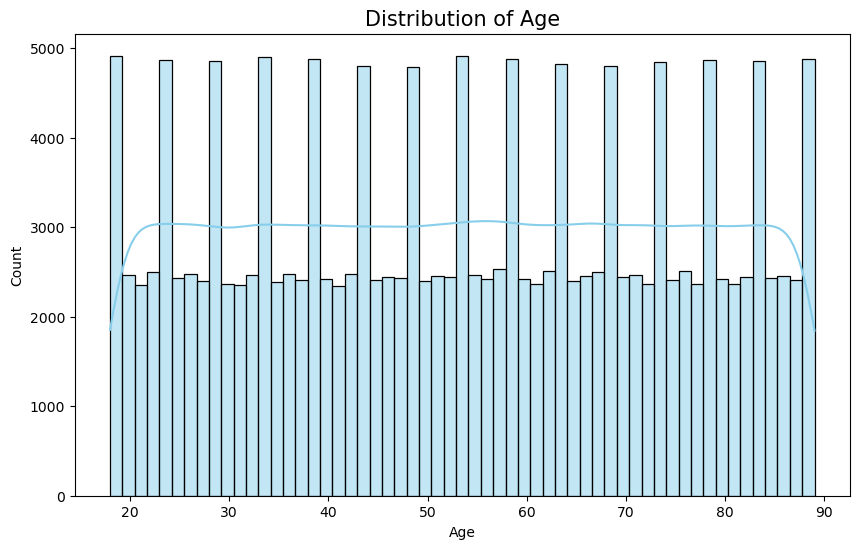

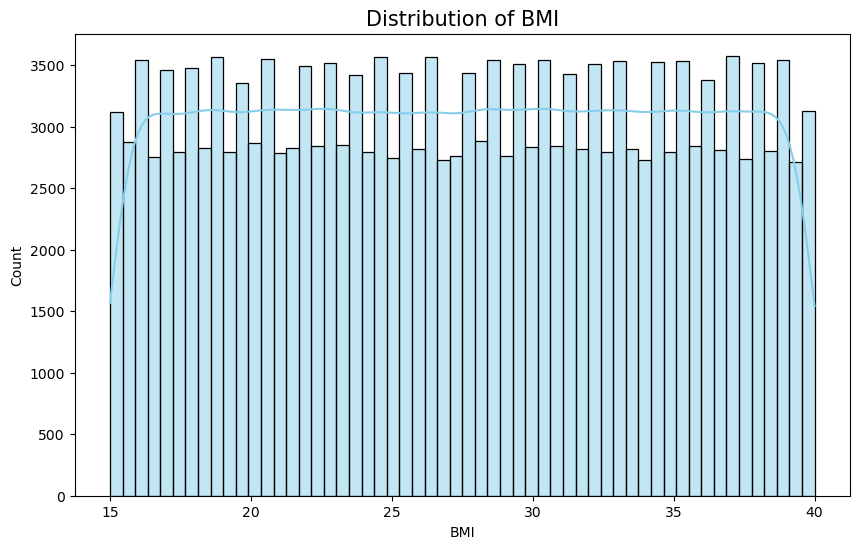

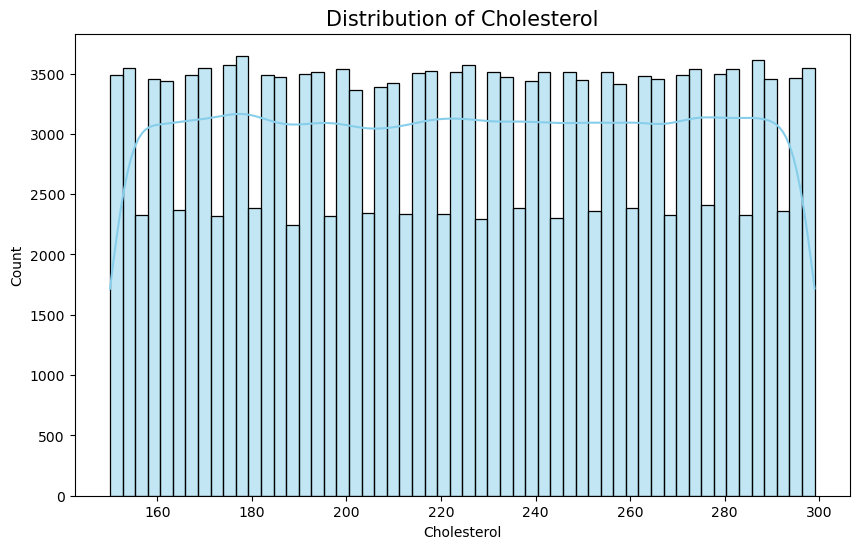

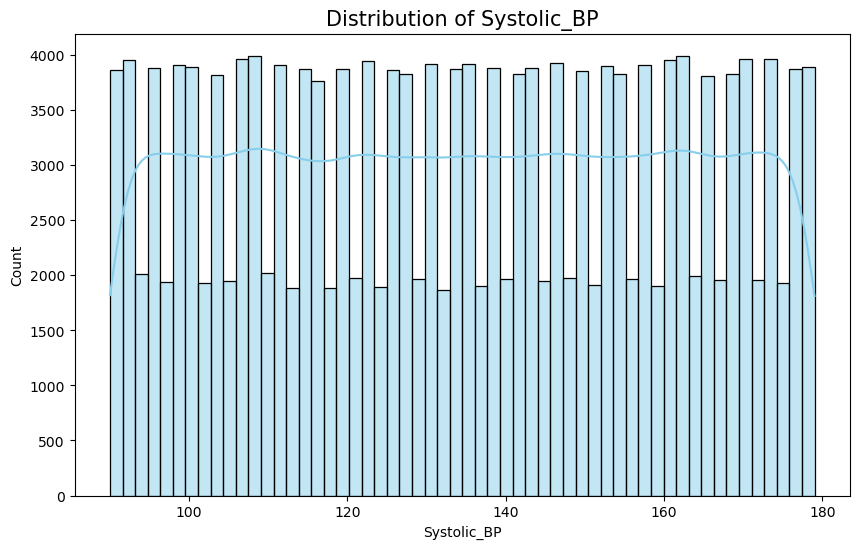

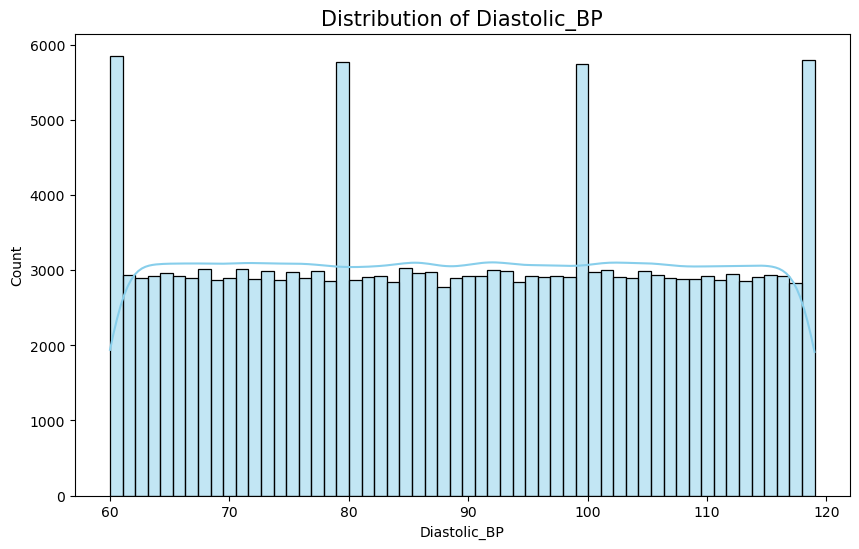

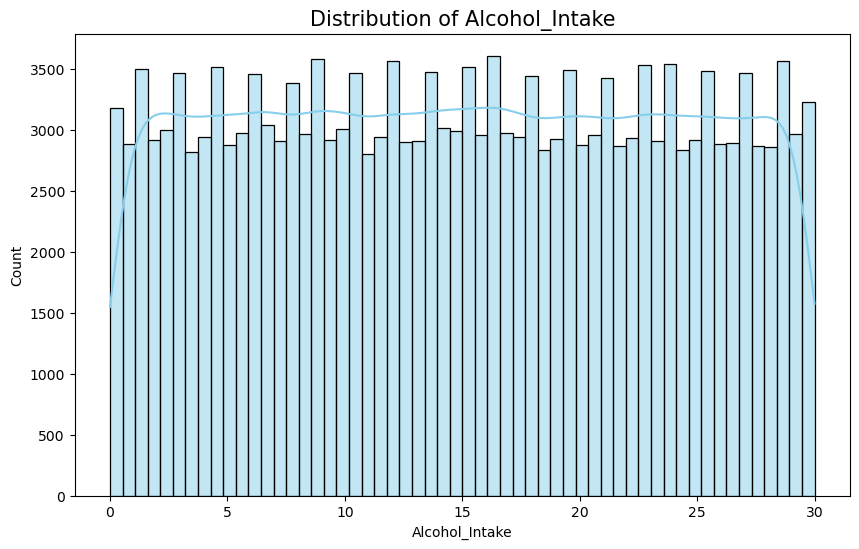

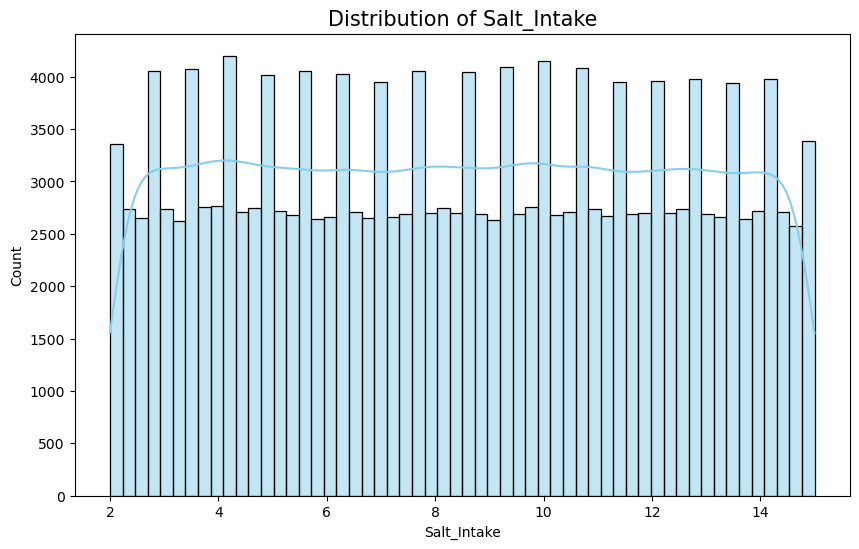

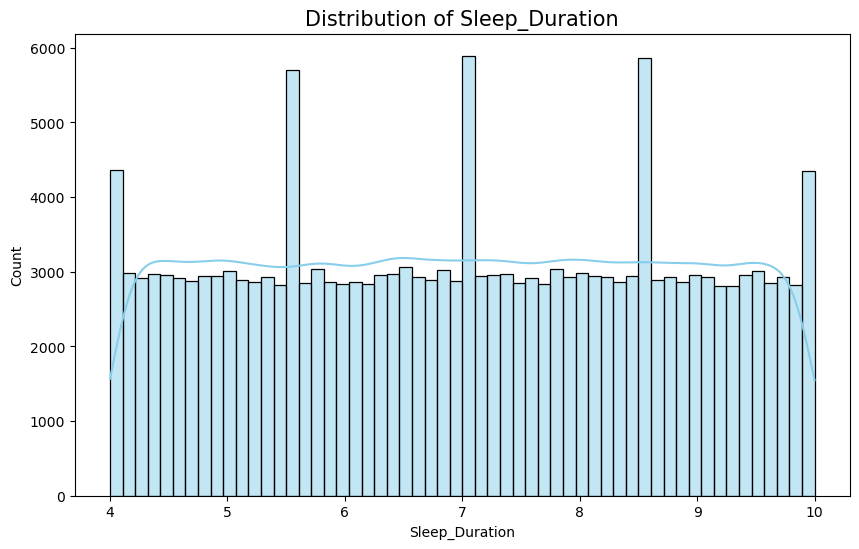

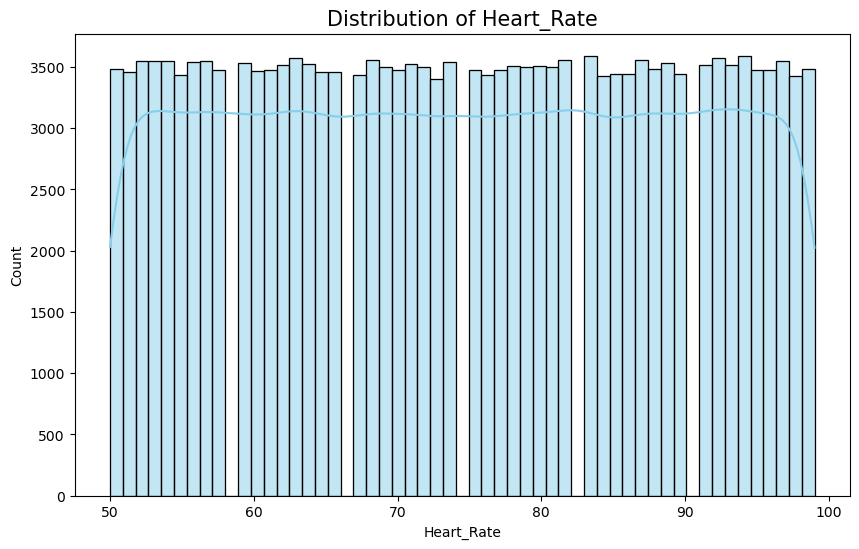

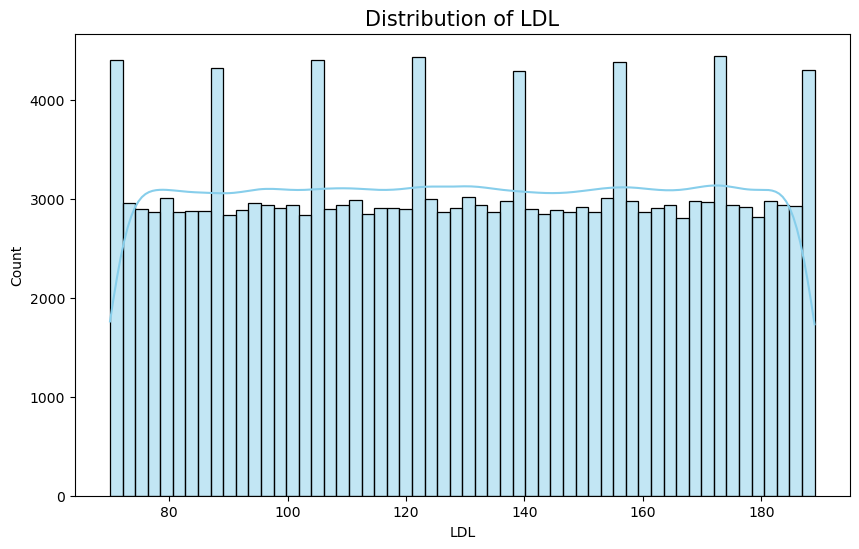

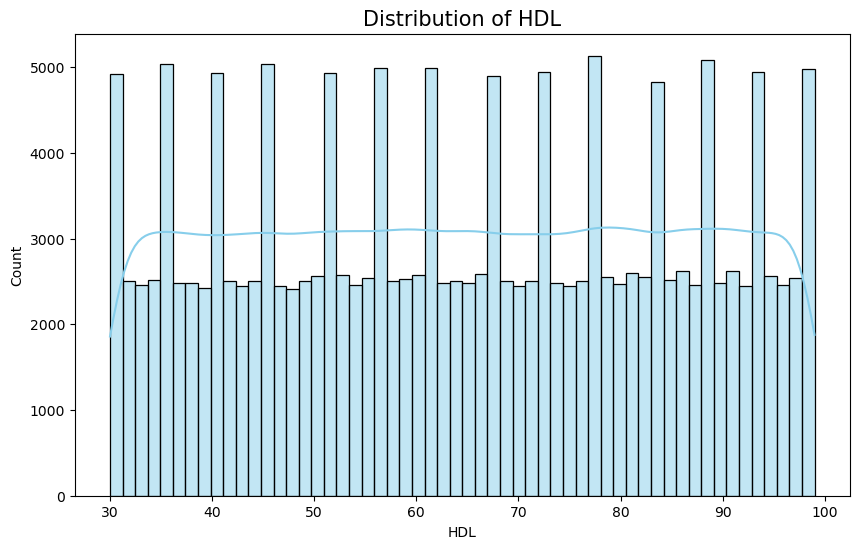

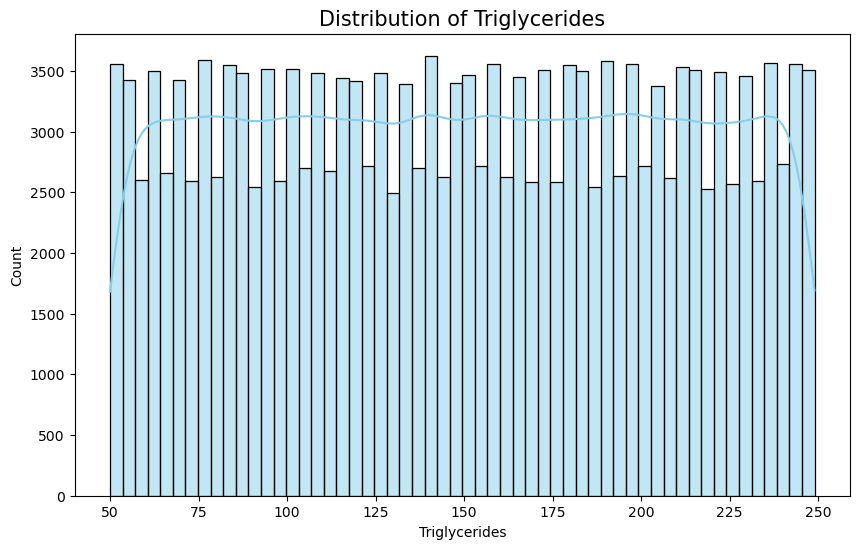

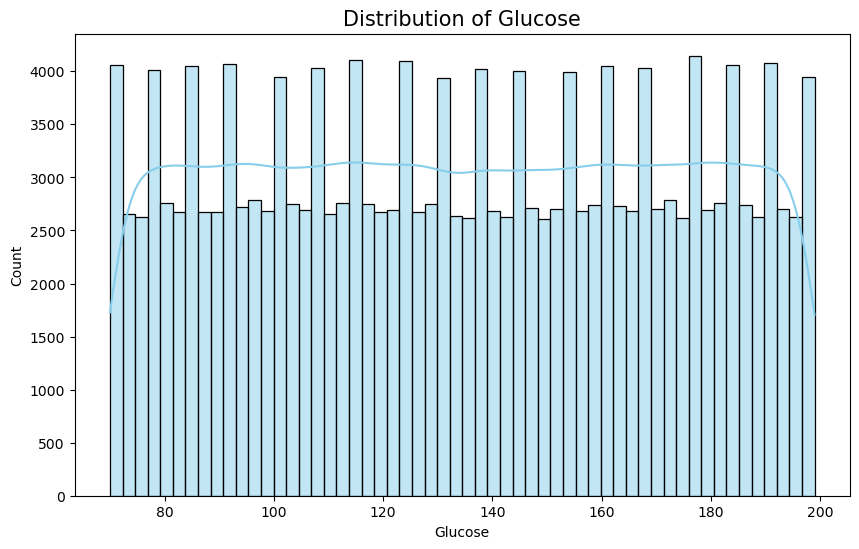

In [36]:
plot_numerical_distribution(df, numerical_cols)

In [37]:
df.columns

Index(['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP',
       'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level',
       'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake',
       'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides',
       'Glucose', 'Gender', 'Education_Level', 'Employment_Status',
       'Hypertension'],
      dtype='object')

In [47]:
# find categorical columns and get rid of it
categorical_cols = df.select_dtypes(include="object").columns.tolist()
categorical_cols # yes/no type stuff

['Country',
 'Smoking_Status',
 'Physical_Activity_Level',
 'Family_History',
 'Diabetes',
 'Gender',
 'Education_Level',
 'Employment_Status',
 'Hypertension']

In [48]:
# categorical_cols.remove("Hypertension") # excluding target variable

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


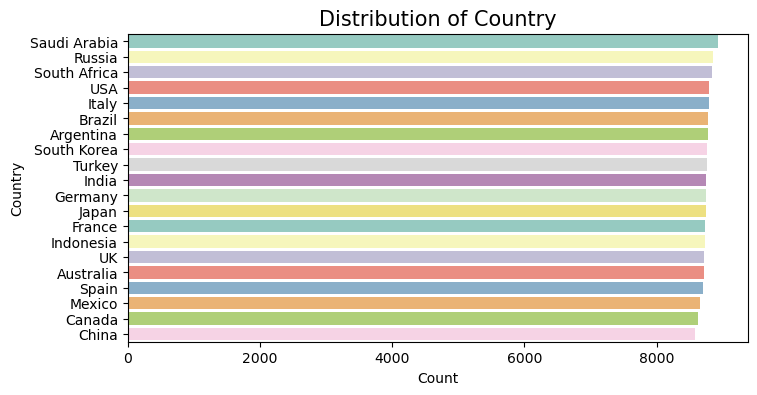

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


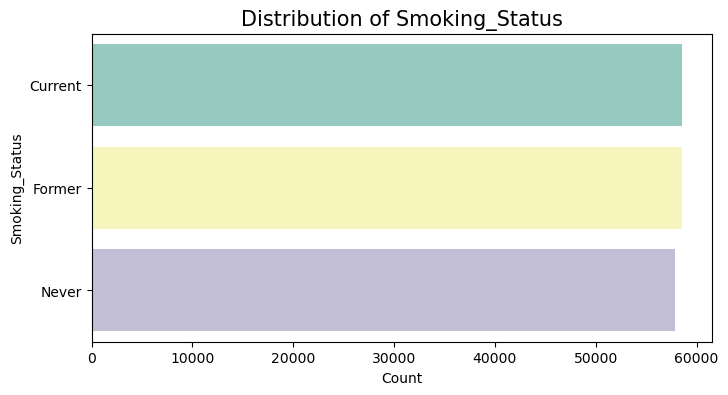

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


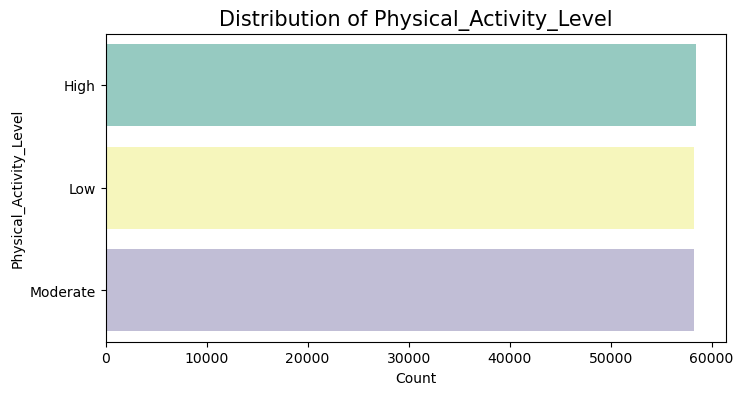

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


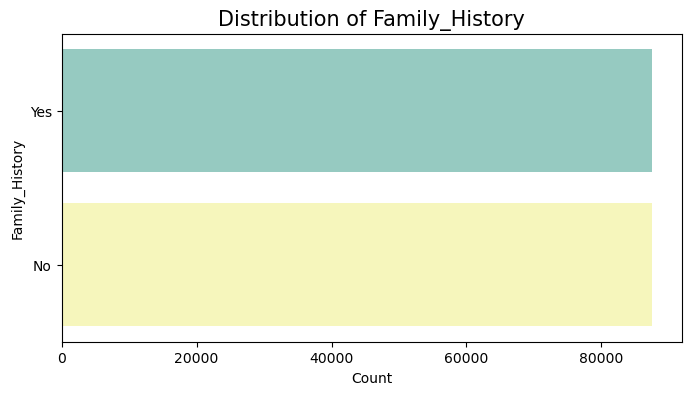

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


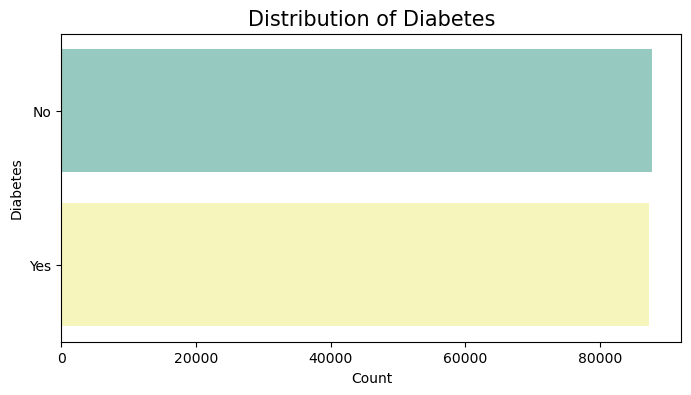

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


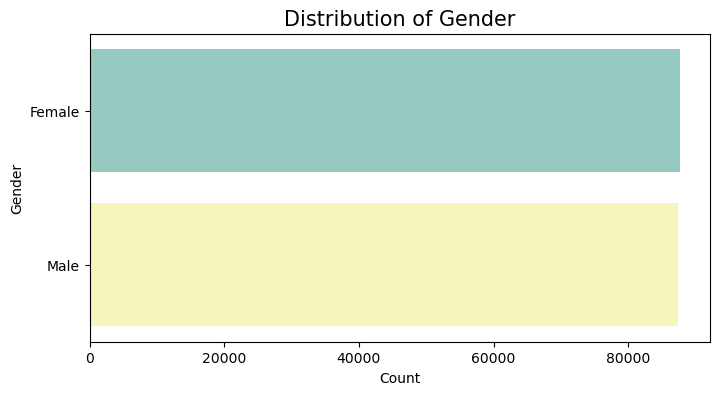

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


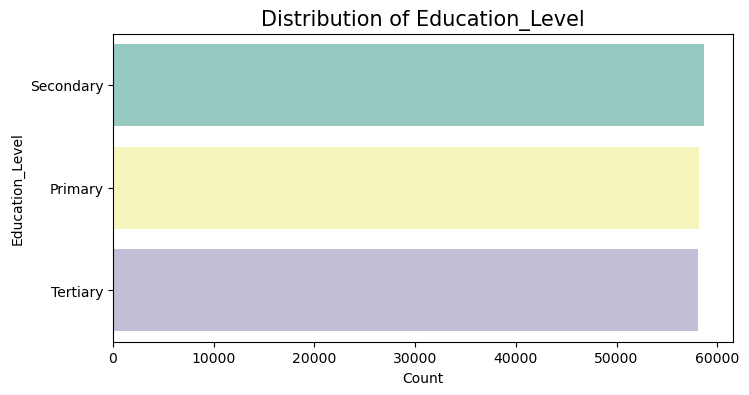

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


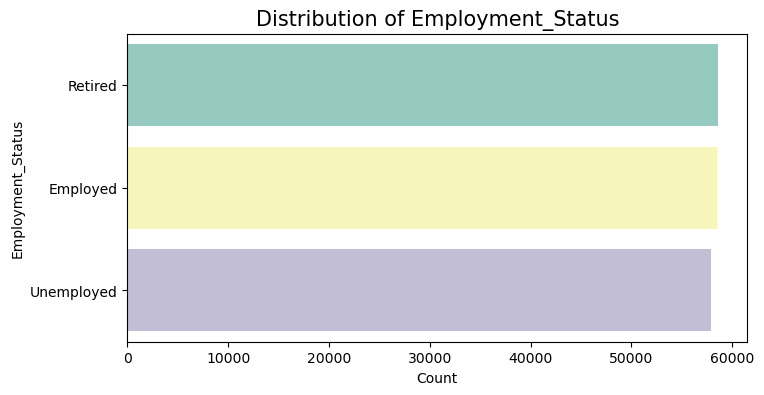

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2456831070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")


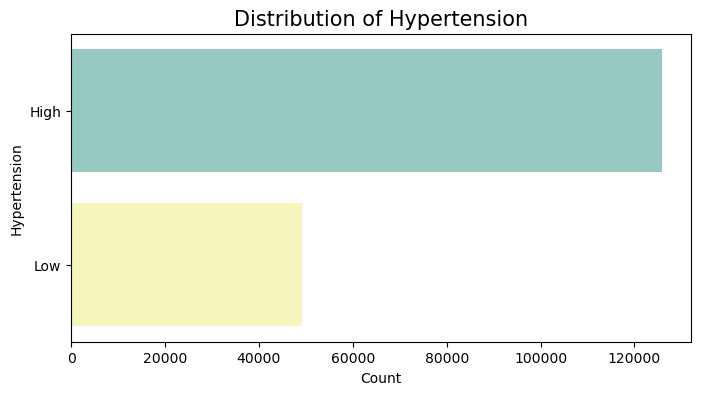

In [62]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="Set3")
    plt.title(f"Distribution of {col}", fontsize=15)
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


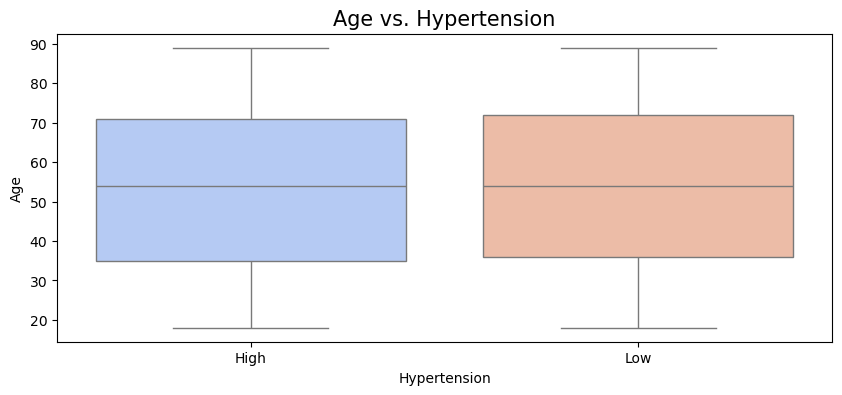

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


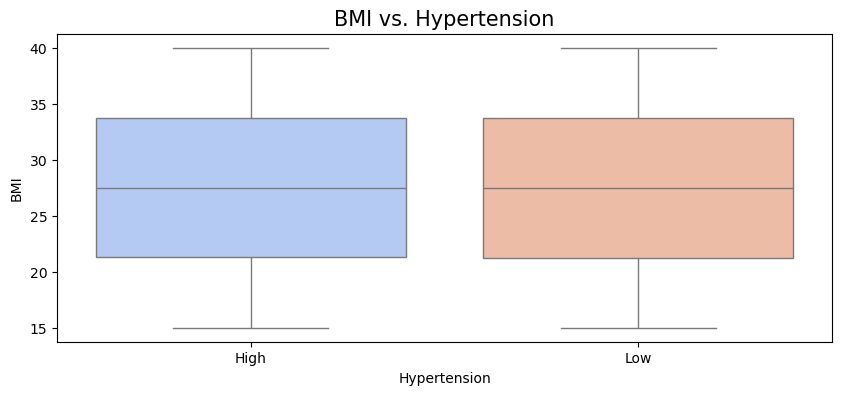

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


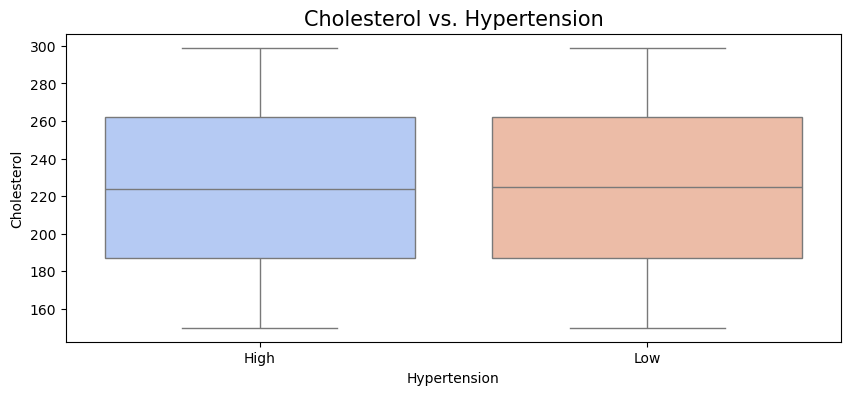

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


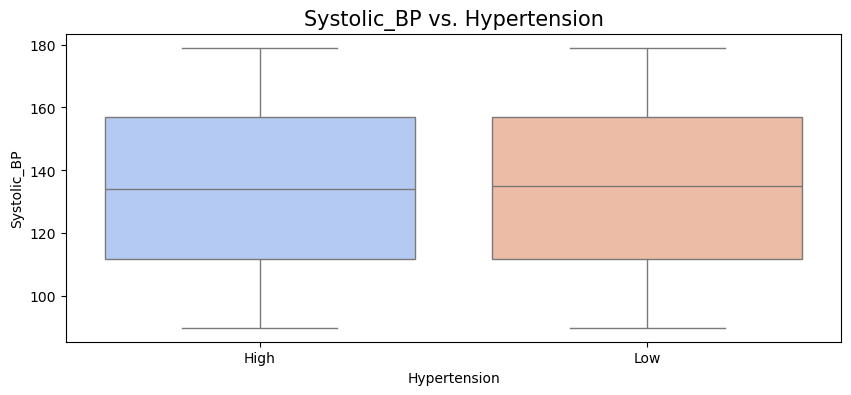

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


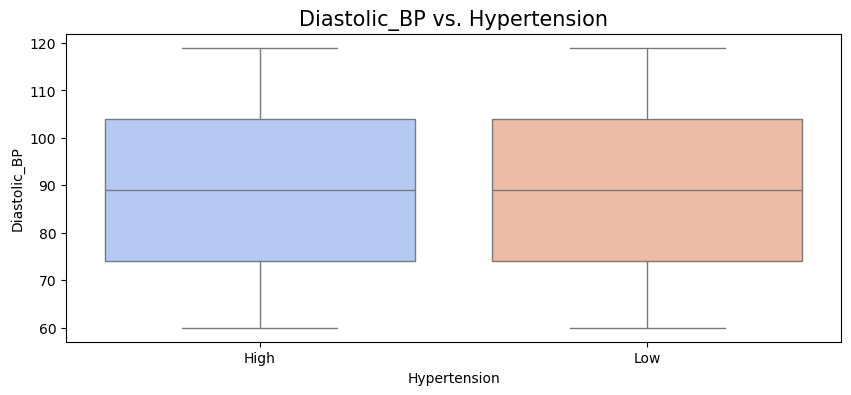

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


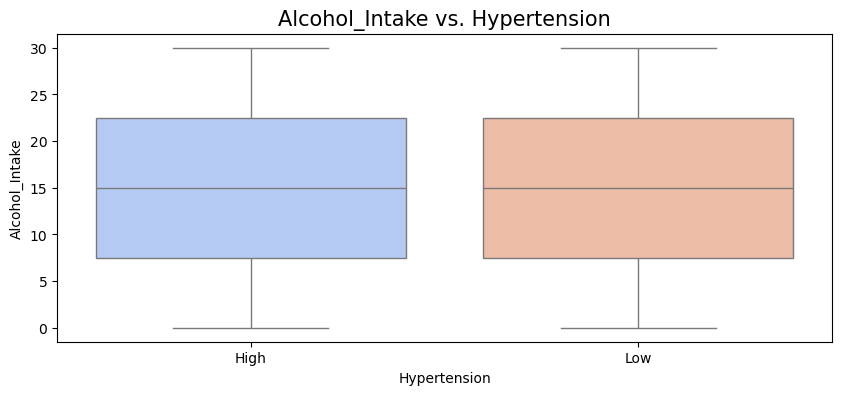

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


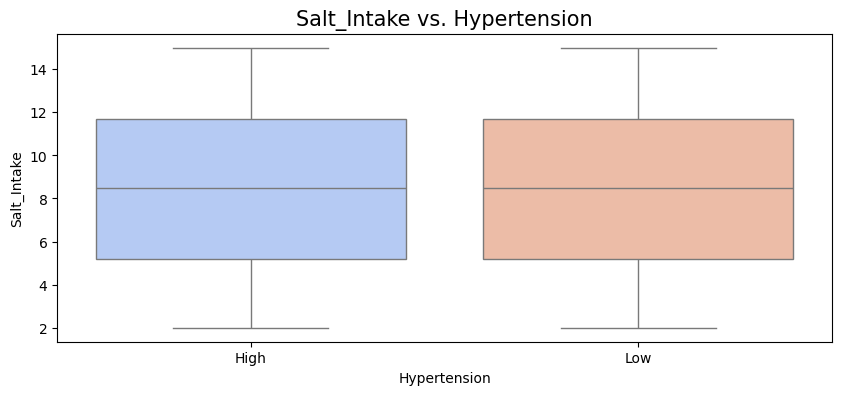

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


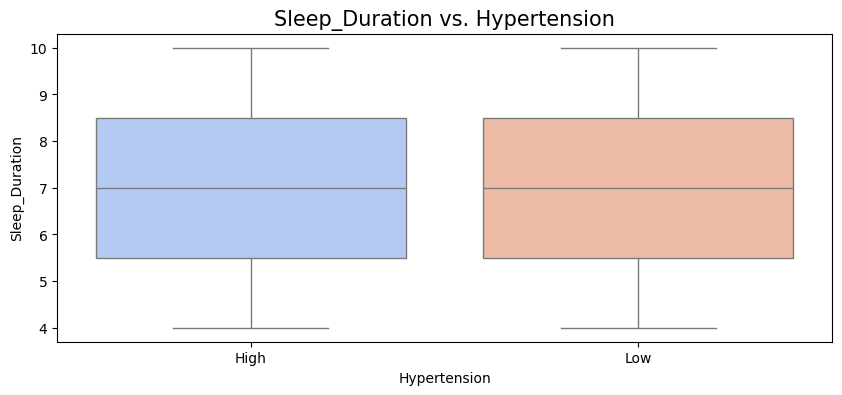

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


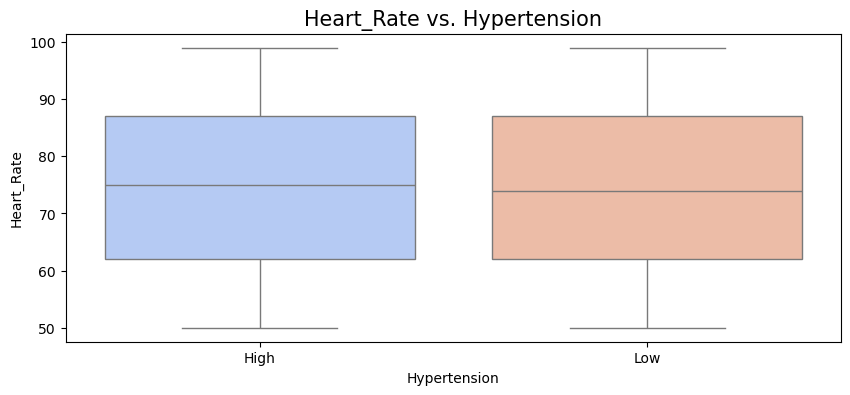

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


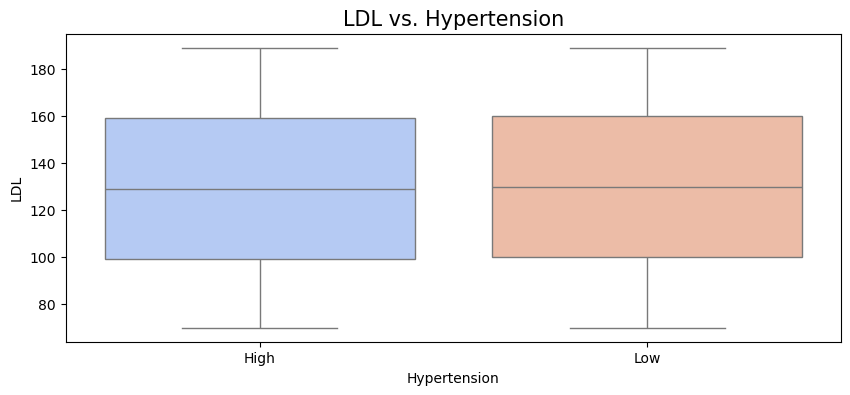

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


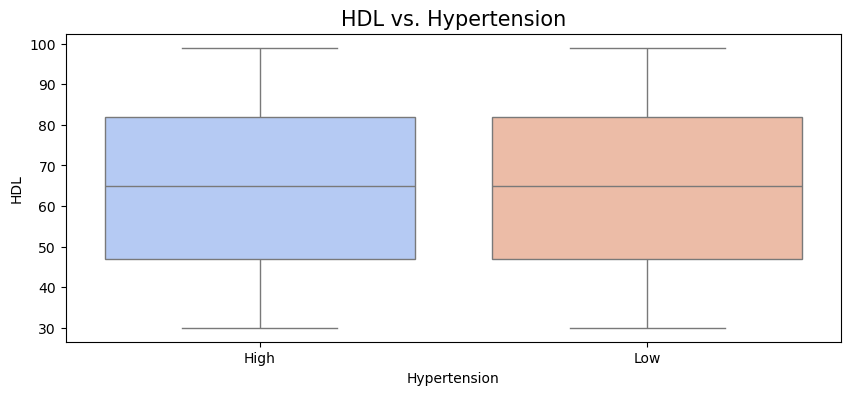

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


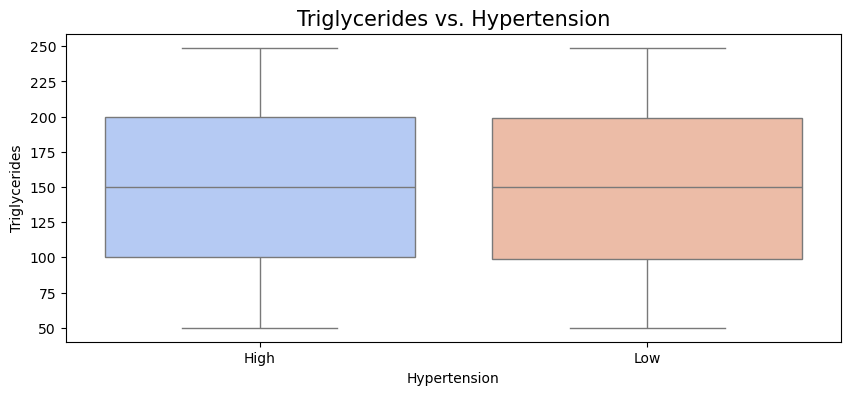

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/3499687074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


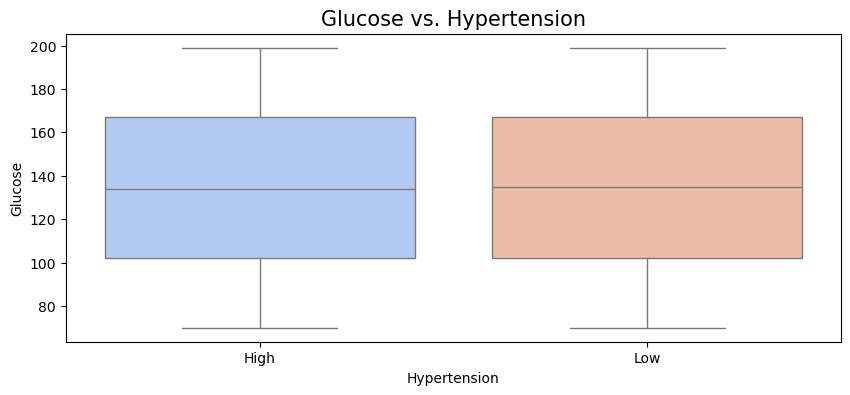

In [54]:
# numerical features vs Hypertension
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")
    plt.title(f"{col} vs. Hypertension", fontsize=15)
    plt.show()

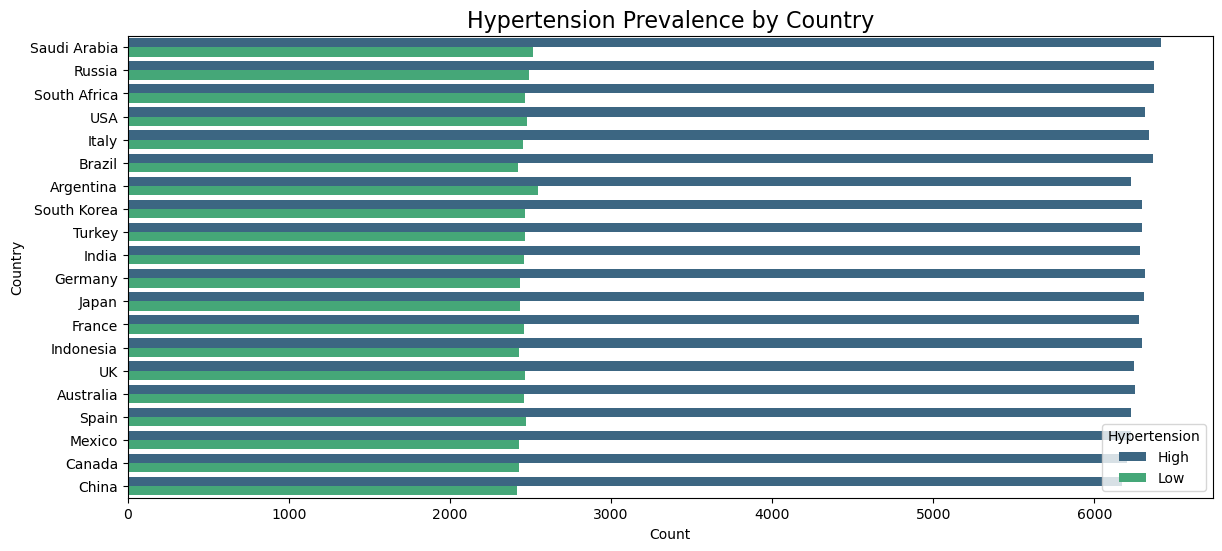

In [63]:
# Multivariate analysis
# country-wise patterns

plt.figure(figsize=(14, 6))
country_order = df["Country"].value_counts().index
sns.countplot(y="Country", hue="Hypertension", data=df, order=country_order, palette="viridis")
plt.title("Hypertension Prevalence by Country", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/407774630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")


NameError: name 'ptl' is not defined

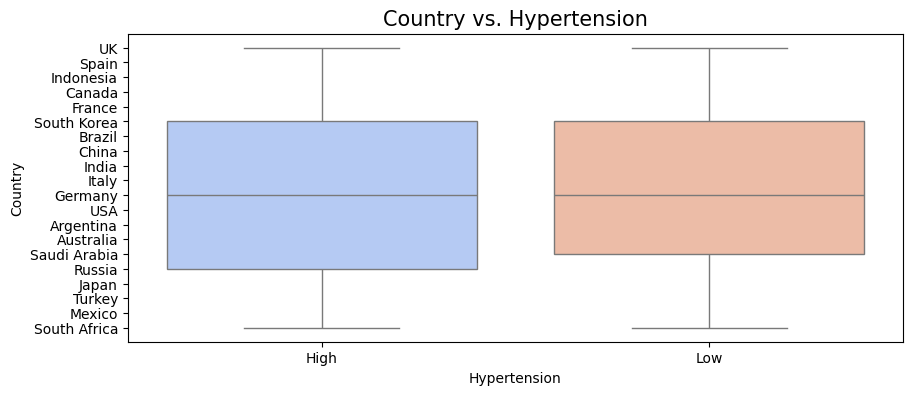

In [64]:
# categorical features vs hypertension
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x="Hypertension", y=col, data=df, palette="coolwarm")
    plt.title(f"{col} vs. Hypertension", fontsize=15)
    ptl.show()

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2333261630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Spectral")


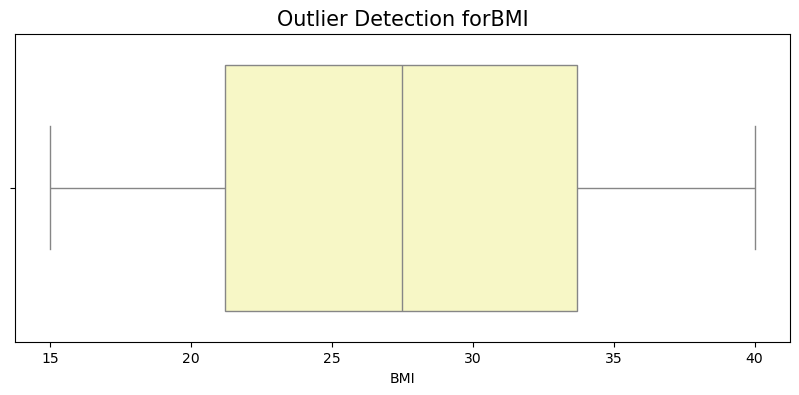

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2333261630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Spectral")


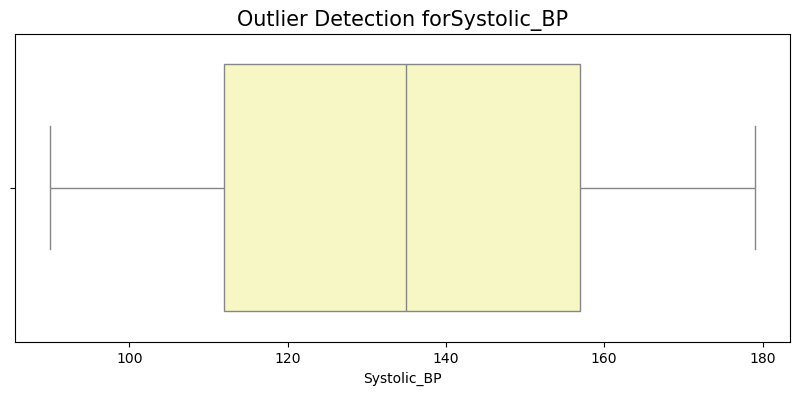

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2333261630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Spectral")


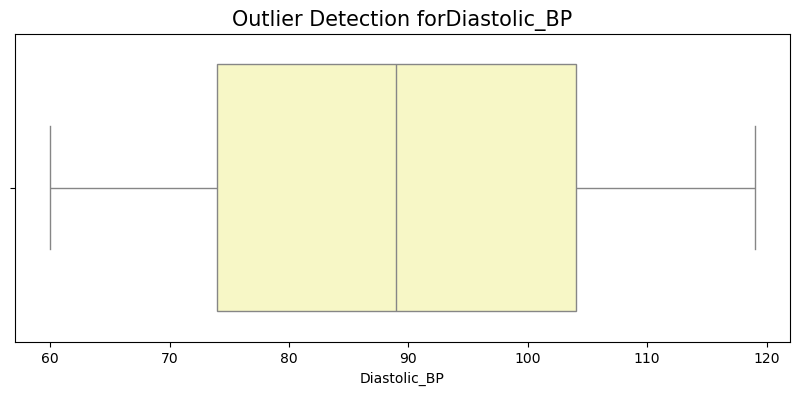

/var/folders/76/6rtq9325701708g16s3dz0kc0000gn/T/ipykernel_29146/2333261630.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Spectral")


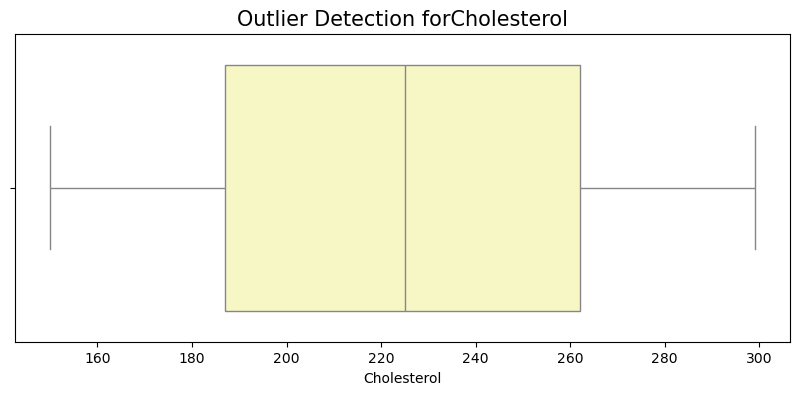

In [65]:
# outlier detection
for col in ["BMI", "Systolic_BP", "Diastolic_BP", "Cholesterol"]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, palette="Spectral")
    plt.title(f"Outlier Detection for{col}", fontsize=15)
    plt.show()

In [66]:
insights = [
    "🔍 The dataset shows a 44% bias towards 'High' hypertension, aligning with real-world trends.",
    "📈 Age, BMI, and Systolic BP seem to have a significant influence on hypertension status.",
    "🌍 Countries like USA and India show higher counts, reflecting dataset distribution.",
    "🚩 Outliers detected in variables like BMI and Cholesterol may require treatment before modeling.",
    "⚡ Lifestyle factors such as smoking, alcohol intake, and physical activity show varying impacts on hypertension."
]

print("💡 **Key Insights:**")
for insight in insights:
    print(insight)

💡 **Key Insights:**
🔍 The dataset shows a 44% bias towards 'High' hypertension, aligning with real-world trends.
📈 Age, BMI, and Systolic BP seem to have a significant influence on hypertension status.
🌍 Countries like USA and India show higher counts, reflecting dataset distribution.
🚩 Outliers detected in variables like BMI and Cholesterol may require treatment before modeling.
⚡ Lifestyle factors such as smoking, alcohol intake, and physical activity show varying impacts on hypertension.
